# **TP 2: ARITMETICA DE PIXELES
Desarrollar un aplicativo que incluya las siguientes funciones:

1- Cuasi suma y resta (clampeada y promediada) en el espacio
de color RGB

2- Ídem punto 1 en el espacio de color YIQ

3- Producto y cociente de dos imágenes

4- Resta de dos imágenes implementando el valor absoluto

5- ‘If- darker ’e ‘ If ligther’texto en negrita**

<ipython-input-60-76e24a0c73d2>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgA=imageio.imread('-Dog.jpeg')


(300, 300, 3) float64


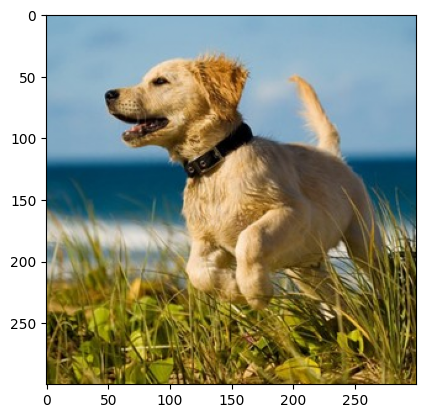

<ipython-input-60-76e24a0c73d2>:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgB=imageio.imread('-oso.jpeg')


(300, 300, 3) float64


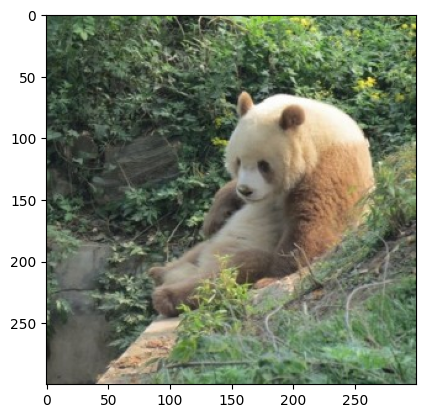

In [60]:
# Importacion de librerias necesarias

#import libreriamac
import imageio
import numpy as np
import matplotlib.pyplot as plt  # para utilizar con el comando imshow
from tkinter import Tk


imgA=imageio.imread('-Dog.jpeg')
imgA= np.clip(imgA/255,0,1) #normalizando [0,1]
print(imgA.shape,imgA.dtype)
plt.imshow(imgA)
plt.show()


imgB=imageio.imread('-oso.jpeg')
imgB= np.clip(imgB/255,0,1)   #normalizando [0,1]
print(imgB.shape,imgB.dtype)
plt.imshow(imgB)
plt.show()


Definimos : Cuasi suma y resta (clampeada y promediada) en el espacio de color RGB

El Resultado es algo proximado o similar a algo más, pero no exactamente igual

Definicion de Funciones

In [61]:
# Suma Clampeada en RGB
def sumaClampeada(img1,img2):
    sumaAB = np.zeros(img1.shape) #creamos una matriz de ceros (np.zeros(img1.shape)) con las mismas dimensiones que img1
                                  #que servirá como contenedor para la imagen resultante.
                                  #Se Realiza la suma componente a componente entre los canales rojo, verde y azul de imA y imB
                                  #Utilizamos np.clip() para asegurarse de que los valores resultantes estén dentro del rango [0, 1]
    sumaAB[:,:,0] = np.clip(img1[:,:,0] + img2[:,:,0],0,1)
    sumaAB[:,:,1] = np.clip(img1[:,:,1] + img2[:,:,0],0,1)
    sumaAB[:,:,2] = np.clip(img1[:,:,2] + img2[:,:,0],0,1)
    return sumaAB

def sumaPromedio(img1,img2):
    SumaPro = np.zeros(img1.shape)
   # Se suma el canal correspondiente de ambas imágenes, luego se divide la suma por 2.
   # La operación (img1[:,:,0] + img2[:,:,0])/2 calcula la suma promedio de los valores de los canales
   # La división por 2 es una forma de normalizar la suma. Si simplemente sumáramos los valores de los canales rojos sin dividir,
   # obtendríamos una suma total que podría ser demasiado grande y estar fuera del rango válido para representar una imagen RGB.
   # Se utiliza np.clip() para asegurarse de que los valores resultantes estén dentro del rango [0, 1].

    SumaPro [:,:,0] = np.clip((img1[:,:,0] + img2[:,:,0])/2,0.,1.)
    SumaPro [:,:,1] = np.clip((img1[:,:,1] + img2[:,:,1])/2,0.,1.)
    SumaPro [:,:,2] = np.clip((img1[:,:,2] + img2[:,:,2])/2,0.,1.)
    return SumaPro

def sumaClampeadaYIQ(img1, img2):
    sumaCla = np.zeros(img1.shape)
    sumaCla[:,:,0] = np.clip(img1[:,:,0] + img2[:,:,0],0,1)
    sumaCla[:,:,1] = np.clip((img1[:,:,0] * img1[:,:,1])+(img2[:,:,0] * img2[:,:,1])/(img1[:,:,0] + img2[:,:,0]),0,1)
    sumaCla[:,:,2] = np.clip((img1[:,:,0] * img1[:,:,2])+(img2[:,:,0] * img2[:,:,2])/(img1[:,:,0] + img2[:,:,0]),0,1)
    return sumaCla

def sumaPromedioYIQ(img1, img2):
    sumaPRO = np.zeros(img1.shape)
    sumaPRO[:,:,0] = np.clip((img1[:,:,0] + img2[:,:,0])/2,0,1)
    sumaPRO[:,:,1] = np.clip(((img1[:,:,0] * img1[:,:,1])+(img2[:,:,0] * img2[:,:,1])/(img1[:,:,0] + img2[:,:,0]))/2,0,1)
    sumaPRO[:,:,2] = np.clip(((img1[:,:,0] * img1[:,:,2])+(img2[:,:,0] * img2[:,:,2])/(img1[:,:,0] + img2[:,:,0]))/2,0,1)
    return sumaPRO


Prueba de la SumaClampeada en RGB y el Promedio

Al promediar dos imágenes, se obtiene una imagen resultante que representa una combinación ponderada de ambas.

La SUMA CLAMPED es más restrictiva y se utiliza para combinar imágenes con precisión, mientras que el PROMEDIO es más suave y se utiliza para obtener una imagen promediada.

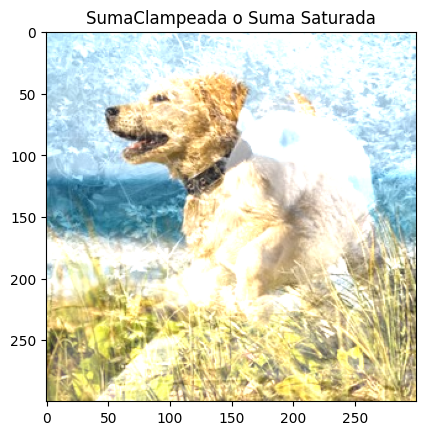

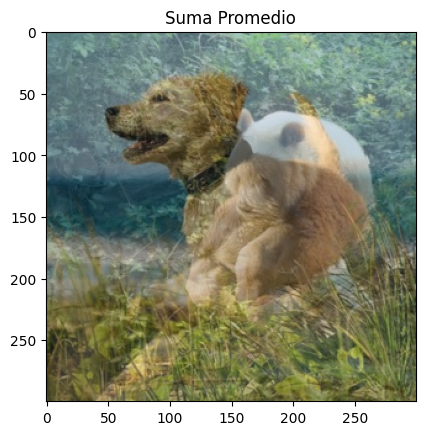

In [62]:
plt.title('SumaClampeada o Suma Saturada')
a=sumaClampeada(imgA,imgB)
plt.imshow(a)
plt.show( )

plt.title('Suma Promedio')
b=sumaPromedio(imgA,imgB)
plt.imshow(b)
plt.show( )





# **Ídem al punto 1 en el espacio de color YIQ**

La suma cuasi en RGB afecta directamente el color, mientras que en YIQ, se enfoca en normalizar los niveles de brillo sin alterar significativamente el color. Ambos enfoques tienen aplicaciones específicas según el contexto y el objetivo del procesamiento de imágenes.



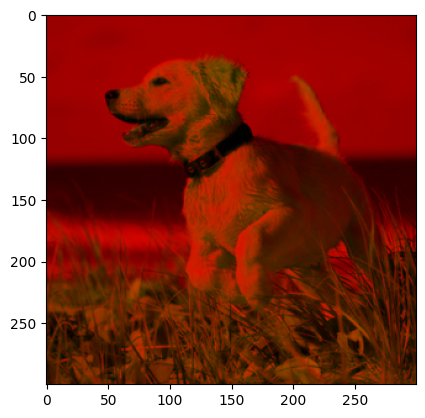

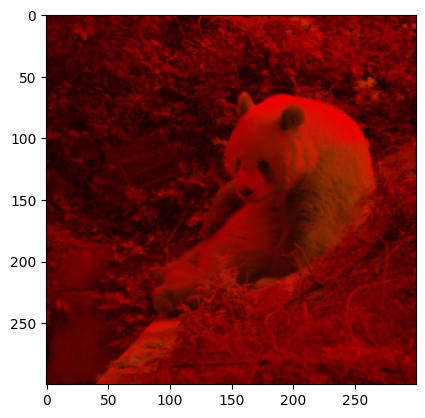

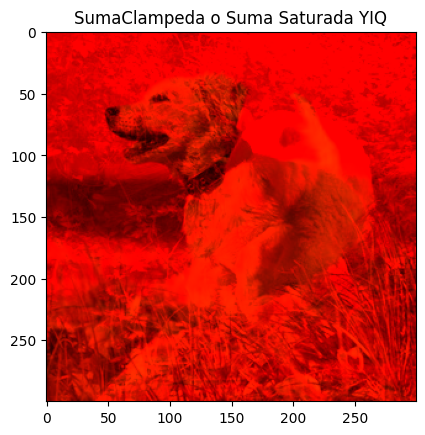

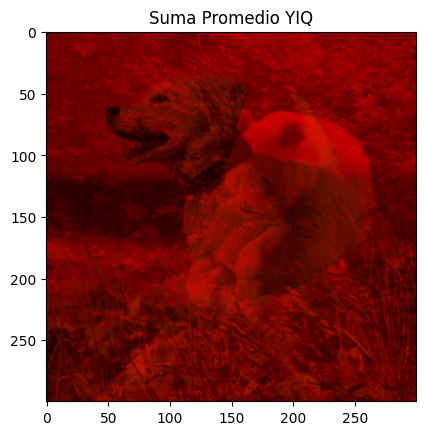

In [63]:
from libreriamac import *
# llamada a la funcion  RGB2YIQ, en mi libreria
imgYiqA=RGB2YIQ(imgA)
plt.imshow(imgYiqA)
plt.show()

imgYiqB=RGB2YIQ(imgB)
plt.imshow(imgYiqB)
plt.show()


plt.title('SumaClampeda o Suma Saturada YIQ')
a=sumaClampeadaYIQ(imgYiqA,imgYiqB)
plt.imshow(a)
plt.show( )

plt.title('Suma Promedio YIQ')
b=sumaPromedioYIQ(imgYiqA,imgYiqB)
plt.imshow(b)
plt.show( )



# Producto y cociente de dos imágenes


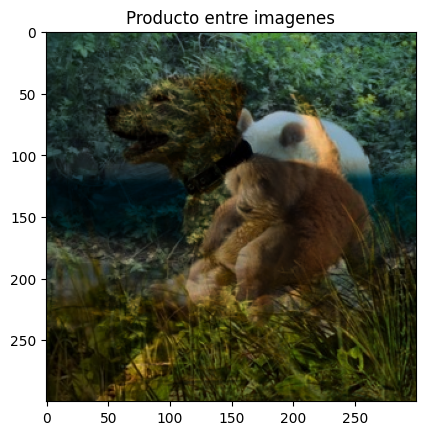

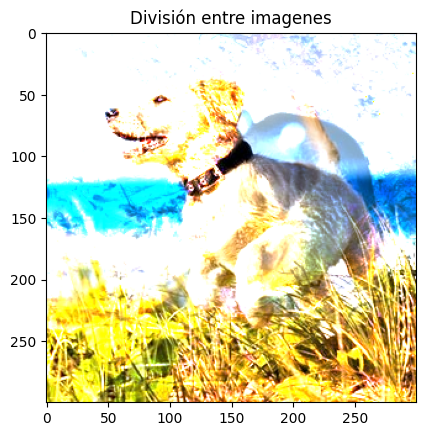

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [218, 222, 255],
        [238, 231, 255],
        [255, 249, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [223, 230, 255],
        [235, 232, 255],
        [238, 232, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [248, 250, 255],
        [242, 246, 255]],

       ...,

       [[255, 255,  86],
        [211, 208,   0],
        [157, 147,   0],
        ...,
        [255, 164,  30],
        [255, 164,   6],
        [255, 221,  61]],

       [[255, 255, 107],
        [255, 255,  46],
        [164, 158,   0],
        ...,
        [255, 234,  83],
        [255, 215,  49],
        [255, 218,  39]],

       [[255, 255, 117],
        [255, 255,  90],
        [186, 180,   3],
        ...,
        [255, 223,  53],
        [255, 228,  43],
        [255, 231,  33]]], dtype=uint8)
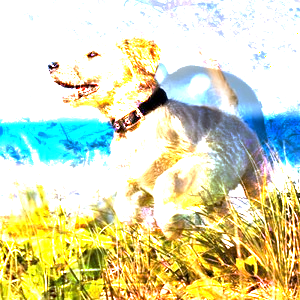

In [64]:
  def productoM(img1,img2):

        producto = np.zeros(img1.shape)
        # al principio estan normalizado las variables /255.0
        producto = img1 * img2
        # producto * 255 reescala los valores de producto de vuelta al rango 0-255.
        # np.clip(..., 0, 255) asegura que todos los valores estén dentro del rango 0-255.
        producto = np.clip(producto * 255, 0, 255).astype(np.uint8)

        # Visualización de la imagen resultante
        plt.title('Producto entre imagenes')
        plt.imshow(producto)
        plt.show()
        return producto

  def dividir_imagenes(img1, img2):

        img_div = np.zeros(img1.shape)
       # Normalización de las imágenes fue hecha en la entrada img1_normalized = img1 / 255.0
       # División elemento a elemento previniendo la division por cero
        img_div = np.divide(img1, img2, out=np.zeros_like(img1), where=img2!=0)

       # Reescalado y recorte de valores
       # astype(np.uint8) entero sin signo de 8 bits debido aque representa valores enteros en el rango pixeles de 0 a 255.
        img_div = np.clip(img_div * 255, 0, 255).astype(np.uint8)

        # Visualización de la imagen resultante
        plt.title('División entre imagenes')
        plt.imshow(img_div)
        plt.show()
        return img_div


productoM(imgA,imgB)
dividir_imagenes(imgA,imgB)




# **Resta de dos imágenes implementando el valor absoluto**

Ejecutando Resta implementado el valor absoluto


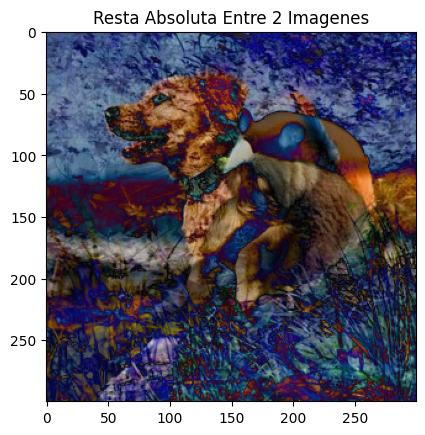

array([[[ 48,  72, 124],
        [ 61,  86, 138],
        [ 53,  77, 125],
        ...,
        [ 19,  24, 103],
        [  8,  16, 113],
        [  7,   3, 124]],

       [[ 35,  59, 110],
        [ 47,  71, 122],
        [ 48,  72, 120],
        ...,
        [ 16,  17, 102],
        [  9,  16, 107],
        [  8,  16, 108]],

       [[ 70,  94, 146],
        [ 65,  89, 141],
        [ 60,  83, 131],
        ...,
        [  4,  10, 113],
        [  3,   2, 106],
        [  5,   6, 105]],

       ...,

       [[ 14,  14,  49],
        [ 14,  15,  74],
        [ 30,  33,  73],
        ...,
        [  2,  50, 105],
        [  0,  48, 112],
        [ 32,  16,  81]],

       [[ 27,  28,  40],
        [  3,   3,  59],
        [ 29,  31,  74],
        ...,
        [ 40,  10,  78],
        [ 28,  20,  92],
        [ 28,  19,  93]],

       [[ 35,  36,  34],
        [ 20,  20,  44],
        [ 22,  24,  73],
        ...,
        [ 33,  16,  90],
        [ 35,  14,  92],
        [ 34,  12,  92]]], dtype=uint8)
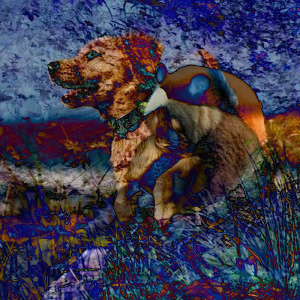

In [76]:

def resta_imagenes(img1,img2):
    print('Ejecutando Resta implementado el valor absoluto')

    # Normalización de las imágenes , fueron ingresados al principio imgA = imgA / 255.0
    # Resta elemento a elemento y valor absoluto

    img_resta = np.abs(img1 - img2)

    # Reescalado y recorte de valores
    img_resta = np.clip(img_resta * 255, 0, 255).astype(np.uint8)

    # Visualización de la imagen resultante
    plt.imshow(img_resta)
    plt.title('Resta Absoluta Entre 2 Imagenes')
    plt.show()
    return img_resta

resta_imagenes(imgA,imgB)